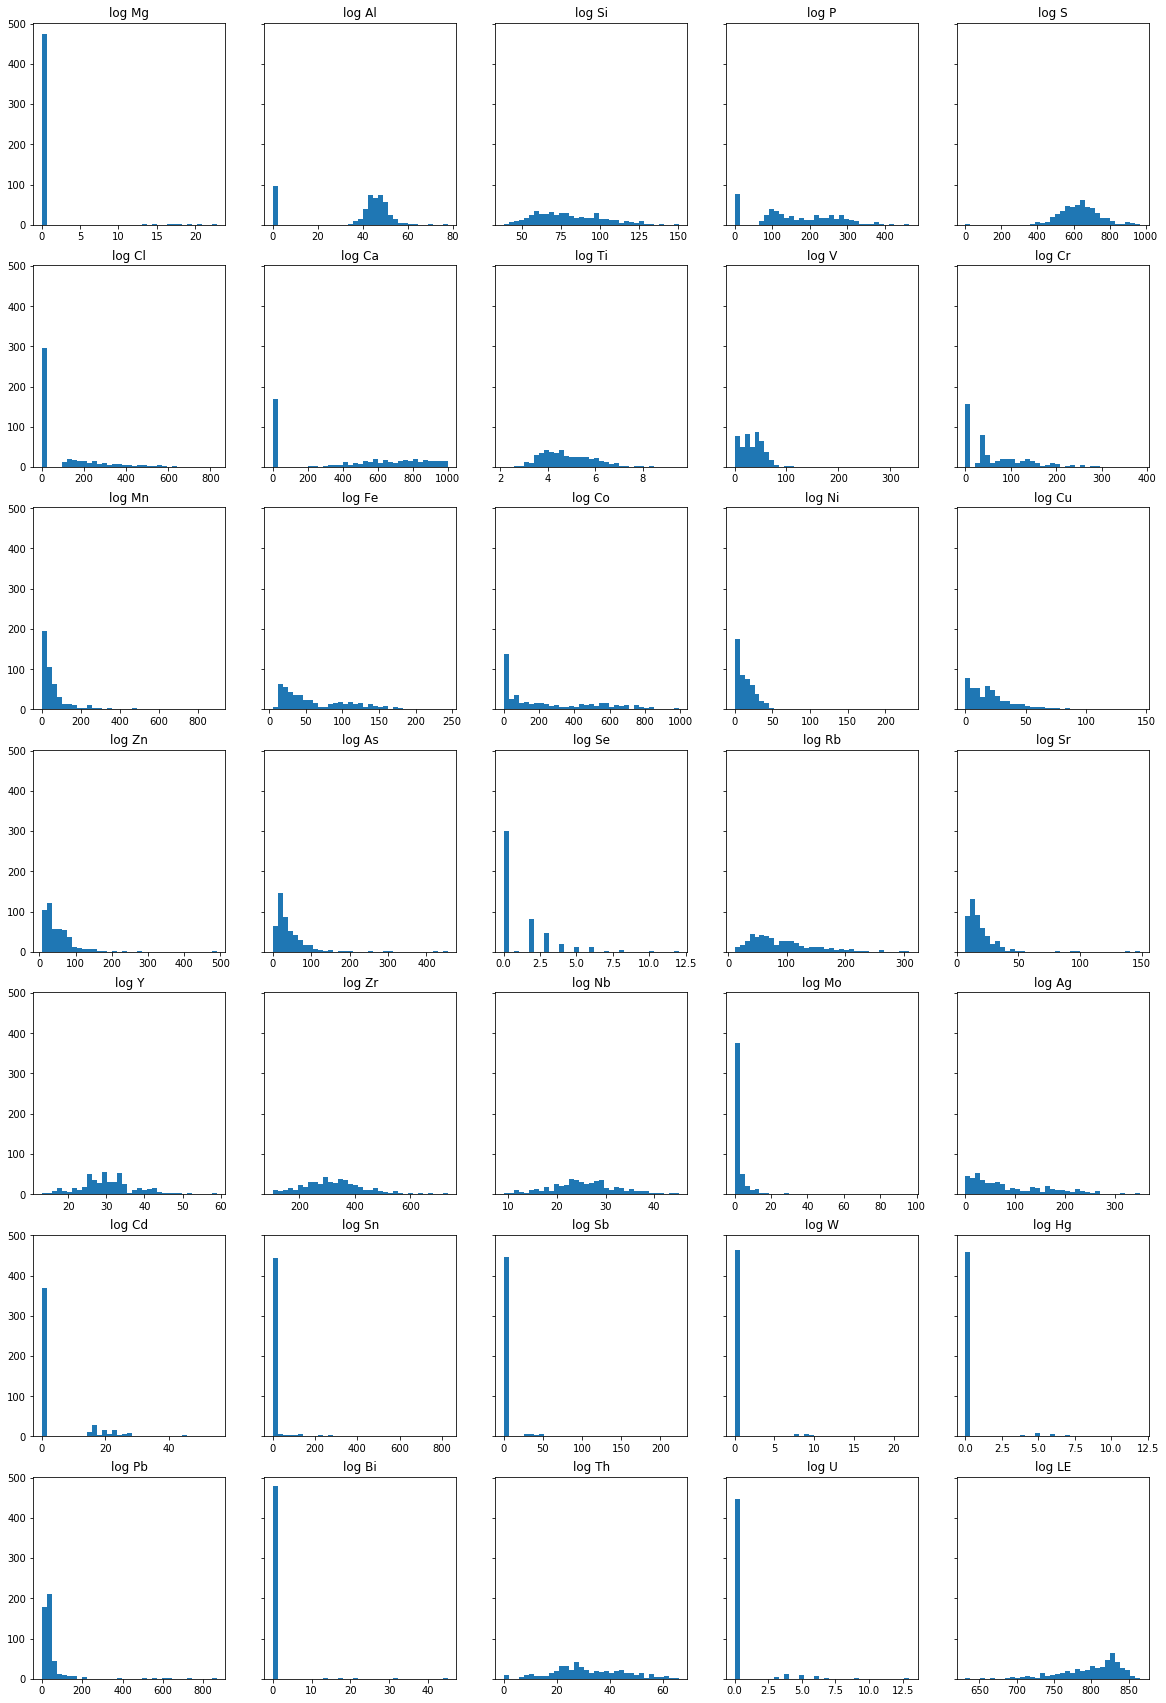

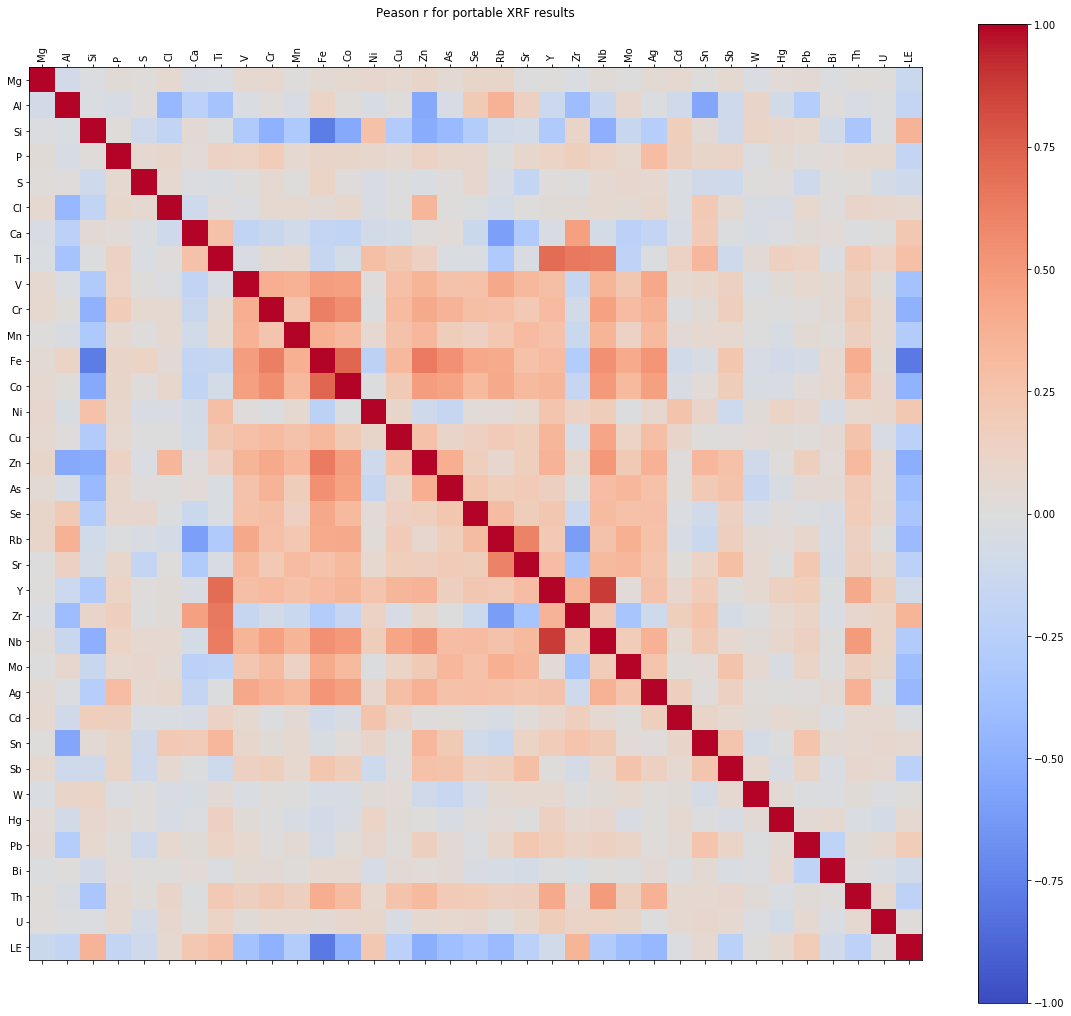

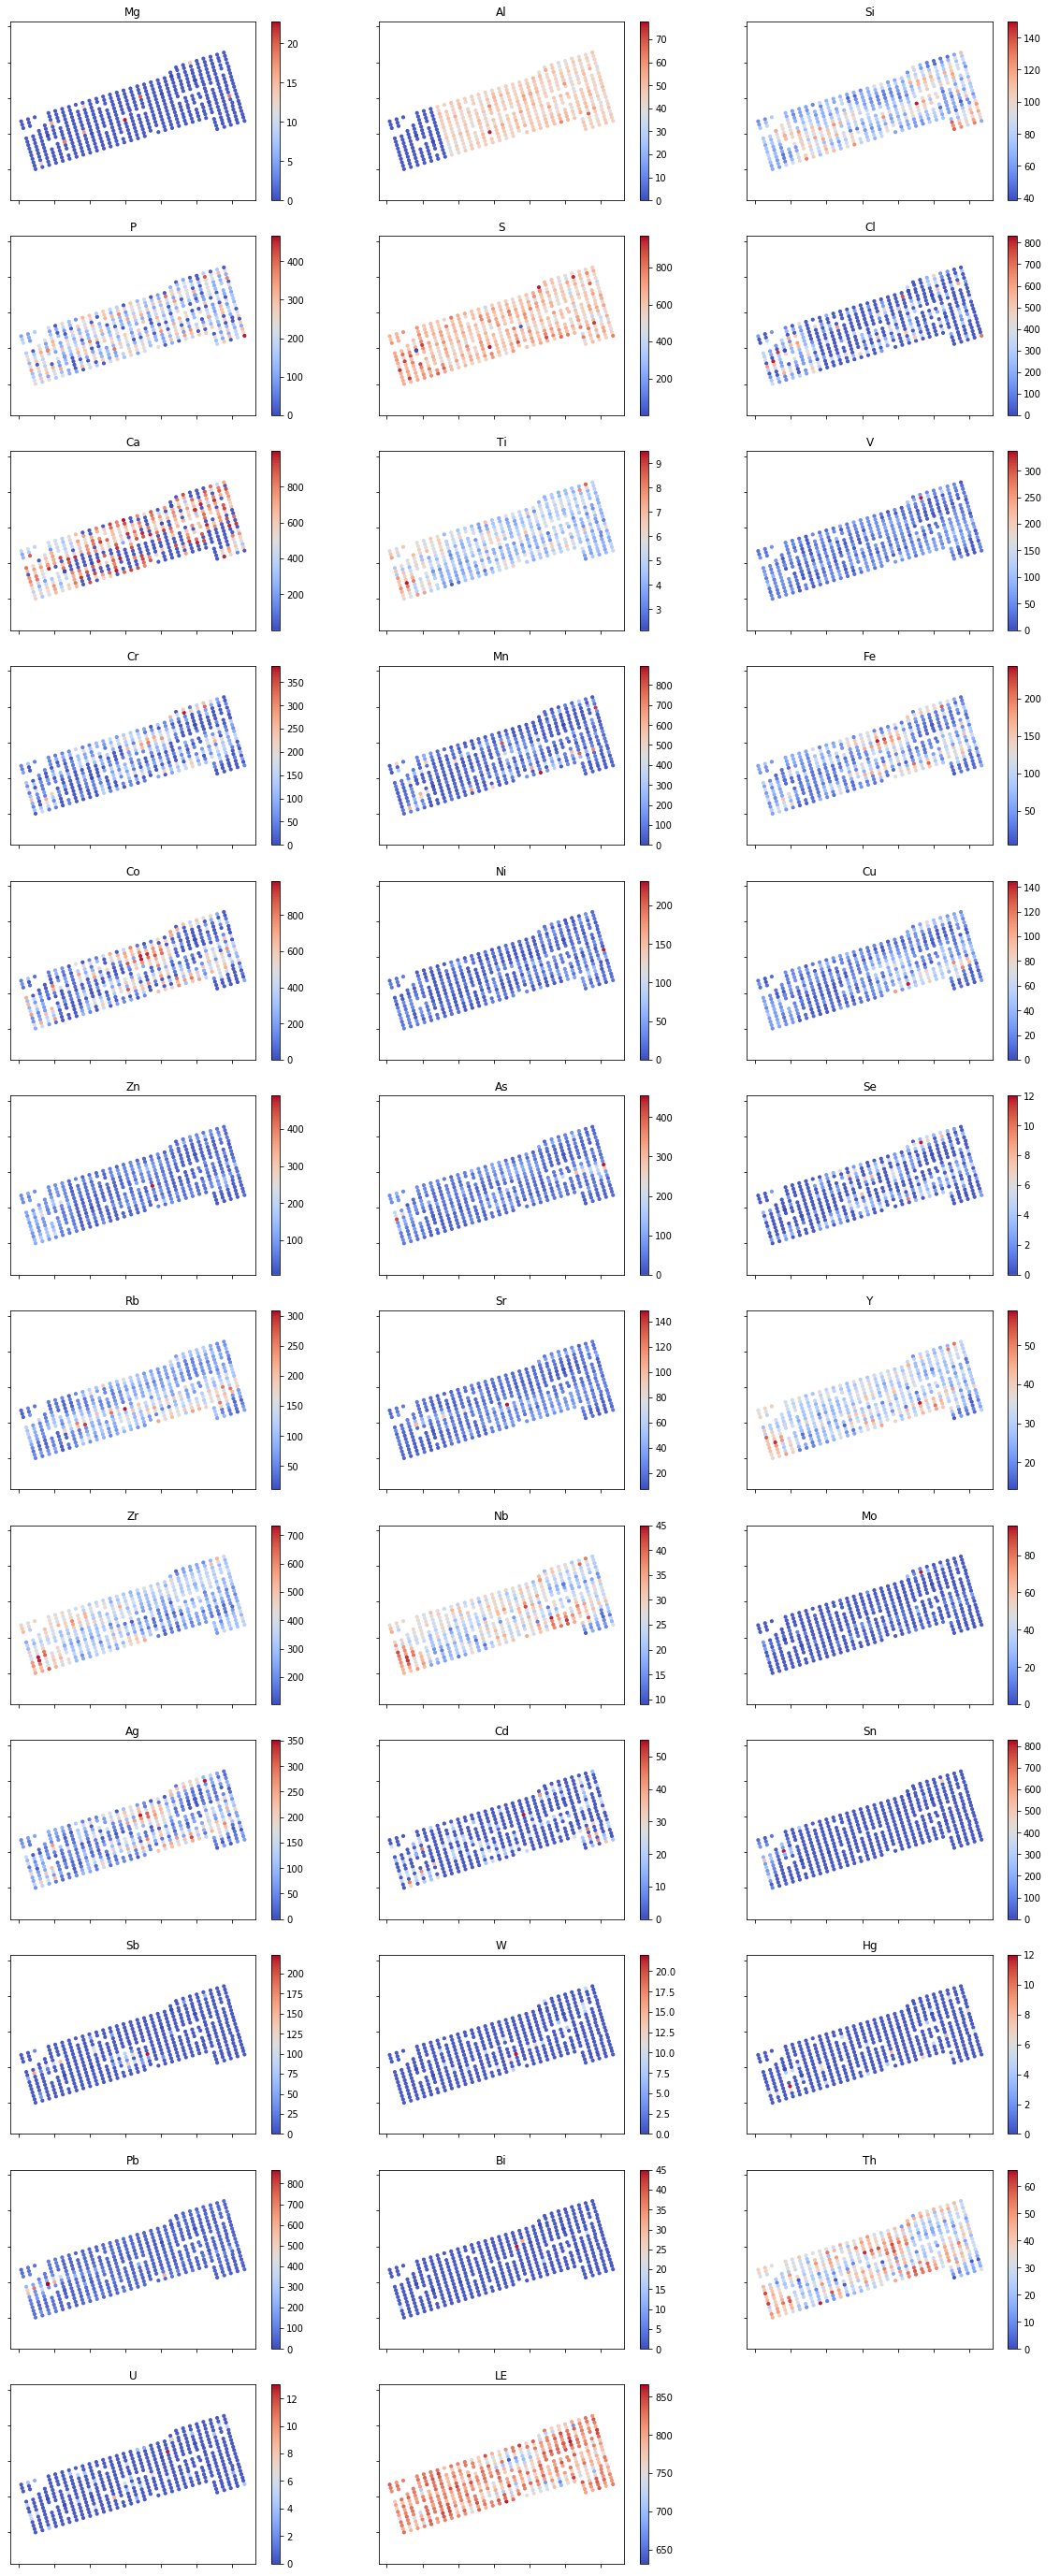

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Global settings for pandas
pd.set_option('display.max_columns', None)


#Read data
data = pd.read_csv('soil_data_example.csv')

#Summary statistics
grade = data.iloc[:,2:]
print(grade.describe())

#logaritmic transformation
grade=np.log(grade+0.0001)

#Histograms
fig1, ax = plt.subplots(nrows=7, ncols=5, figsize=(20,8), sharey=True)
plt.subplots_adjust(top=3)
row=0
col=0
for element in data.iloc[:,2:].columns:
    x=list(data[element])
    ax[row,col].hist(x, bins=35)
    ax[row,col].set_title("log " + element)
    if col<4:
        col+=1
    else:
        col=0
        row+=1

#Correlation matrix
cor_matrix = grade.corr()
fig2 = plt.figure(figsize=(20, 18))
ax = fig2.add_subplot(111)
cax = ax.matshow(cor_matrix,cmap='coolwarm', vmin=-1, vmax=1)
ticks = np.arange(0,len(grade.columns),1)

fig2.colorbar(cax)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
plt.title('Peason r for portable XRF results')
ax.set_yticks(ticks)
ax.set_xticklabels(grade.columns)
ax.set_yticklabels(grade.columns)

#Map plots
fig3, ax = plt.subplots(figsize=(20,50), nrows=12, ncols=3)
rows=0
cols=0 
for element in grade:
    cax = ax[rows,cols].scatter(data['EASTING'], data['NORTHING'], c=grade[element], cmap='coolwarm', s=10, alpha=0.9)
    ax[rows,cols].set_xticklabels('')
    ax[rows,cols].set_yticklabels('')
    ax[rows,cols].set_title(element)
    ax[rows,cols].axis('equal')
    fig3.colorbar(cax, ax=ax[rows,cols])
    if cols<2:
        cols+=1
    else:
        cols=0
        rows+=1
ax[11,2].set_axis_off()

plt.show()

